# Linear Regression: The TensorFlow Way

For this script, we introduce how to perform linear regression in the context of TensorFlow.

We will solve the linear equation system:

$$ y = Ax + b$$

With the Sepal length (y) and Petal width (x) of the Iris data.

Performing linear regression in TensorFlow is a lot easier than trying to understand Linear Algebra or Matrix decompositions for the prior two recipes.  We will do the following:

 1. Create the linear regression computational graph output. This means we will accept an input, $x$, and generate the output, $Ax + b$.
 2. We create a loss function, the L2 loss, and use that output with the learning rate to compute the gradients of the model variables, $A$ and $b$ to minimize the loss.
 
The benefit of using TensorFlow in this way is that the model can be routinely updated and tweaked with new data incrementally with any reasonable batch size of data.  The more iterative we make our machine learning algorithms, the better.

We start by loading the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

We create a graph session.

In [2]:
sess = tf.Session()

Next we load the Iris data from the Scikit-Learn library.

In [3]:
# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
x_vals.shape, y_vals.shape

((150,), (150,))

With most TensorFlow algorithms, we will need to declare a batch size for the placeholders and operations in the graph.  Here, we set it to 25.  We can set it to any integer between 1 and the size of the dataset.

For the effect of batch size on the training, see [Chapter 2: Batch vs Stochastic Training](https://github.com/nfmcclure/tensorflow_cookbook/tree/master/02_TensorFlow_Way/06_Working_with_Batch_and_Stochastic_Training)

In [5]:
# Declare batch size
batch_size = 25

We now initialize the placeholders and variables in the model.

In [6]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
#  Since it is a two-dimensional linear regression, the coefficient is one-dimensional
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

We add the model operations (linear model output) and the L2 loss.

In [7]:
# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare loss function (L2 loss)
# loss = tf.reduce_mean(tf.square(y_target - model_output))
loss = tf.losses.mean_squared_error(labels=y_target, predictions=model_output)

We have to tell TensorFlow how to optimize and back propagate the gradients.  We do this with the standard Gradient Descent operator (`tf.train.GradientDescentOptimizer`), with the learning rate argument of $0.05$.

Then we initialize all the model variables.

In [8]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

We start our training loop and run the optimizer for 100 iterations.

In [9]:
# Training loop
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i + 1) % 25 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' +
              str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #25 A = [[2.1050436]] b = [[2.9326954]]
Loss = 1.0542685
Step #50 A = [[1.6003169]] b = [[3.63603]]
Loss = 0.6970959
Step #75 A = [[1.3540335]] b = [[4.1164823]]
Loss = 0.31946203
Step #100 A = [[1.1838205]] b = [[4.3737974]]
Loss = 0.47535735


We pull out the optimal coefficients and get the best fit line.

In [10]:
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

Plot the results with Matplotlib.  Along with the linear fit, we will also plot the L2 loss over the model training iterations.

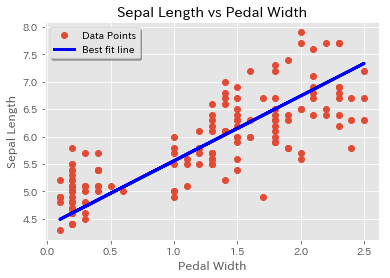

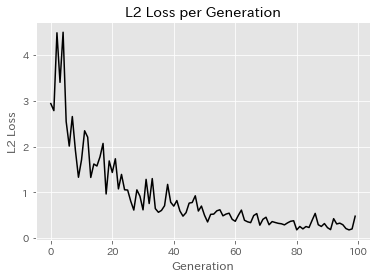

In [14]:
# Plot the result
plt.style.use("ggplot")
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'b-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left', shadow=True, frameon=True)
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()